In [ ]:
#########################################################
# name: dataPreparation_variableSelection.ipynb
# Description: This program merges all the files and 
# prepares the data for model input
# Input Data : ./dataScienceTask
# Output Data: ./input
#########################################################

In [1]:
# Load required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
# Read in all the datasets
df_creatinine = pd.read_csv("./dataScienceTask/T_creatinine.csv")
print("Creatinine", df_creatinine.shape)
# rename the value column
df_creatinine =  df_creatinine.rename({'value': 'vCreatinine'}, axis=1)

# read the diastolic blood pressure measurements
df_dbp = pd.read_csv("./dataScienceTask/T_DBP.csv")
print("dbp", df_dbp.shape)
# rename the value column
df_dbp =  df_dbp.rename({'value': 'vDBP'}, axis=1)

# read the glucose measurements
df_gluc = pd.read_csv("./dataScienceTask/T_glucose.csv")
print("Glucose", df_gluc.shape)
# rename the value column
df_gluc =  df_gluc.rename({'value': 'vGlucose'}, axis=1)

# read the hemoglobin measurements
df_hgb = pd.read_csv("./dataScienceTask/T_HGB.csv")
# rename the value column
df_hgb =  df_hgb.rename({'value': 'vHGB'}, axis=1)
# subset to consider only 2 years data
df_hgb = df_hgb
df_hgb =  df_hgb[df_hgb.time <=699]
# Print the shape
print("hgb", df_hgb.shape)
# read the Low-density lipoprotein measurements
df_ldl = pd.read_csv("./dataScienceTask/T_ldl.csv")
print("ldl", df_ldl.shape)
# rename the value column
df_ldl =  df_ldl.rename({'value': 'vLDL'}, axis=1)

# read the Systolic blood pressure measurements
df_sbp = pd.read_csv("./dataScienceTask/T_SBP.csv")
print("sbp", df_sbp.shape)
# rename the value column
df_sbp =  df_sbp.rename({'value': 'vSBP'}, axis=1)


Creatinine (1439, 3)
dbp (1821, 3)
Glucose (1556, 3)
hgb (1129, 3)
ldl (1261, 3)
sbp (1809, 3)


In [49]:
# Read medication data and patients data
df_demo = pd.read_csv("./dataScienceTask/T_demo.csv")
df_meds = pd.read_csv("./dataScienceTask/T_meds.csv")
df_stage = pd.read_csv("./dataScienceTask/T_stage.csv")

In [5]:
## Merging all the dataframes

merge1 = pd.merge(df_creatinine, df_dbp, how='outer', on=['id', 'time'])
merge2 = pd.merge(merge1, df_gluc, how = 'outer', on = ['id', 'time'])
merge3 = pd.merge(merge2, df_hgb, how = 'outer', on = ['id', 'time'])
merge4 = pd.merge(merge3, df_ldl, how = 'outer', on = ['id', 'time'])
merge5 = pd.merge(merge4, df_sbp, how = 'outer', on = ['id', 'time'])

In [34]:
# create a duplicate to check for the number dimension of data.

merge5_dup = merge5.fillna(0)
num_obs = merge5_dup.groupby(['id']).agg(['count'])
num_obs.describe()

,vCreatinine,time,vDBP,vGlucose,vHGB,vLDL,vSBP
,count,count,count,count,count,count,count
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,12.883333,12.883333,12.883333,12.883333,12.883333,12.883333,12.883333
std,4.042796,4.042796,4.042796,4.042796,4.042796,4.042796,4.042796
min,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
25%,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
50%,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
75%,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
max,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000


In [40]:
num_obs.iloc[:,1]

id
0      12
1      15
2      10
3      15
4      16
       ..
295    19
296    13
297    18
298    17
299    12
Name: (time, count), Length: 300, dtype: int64

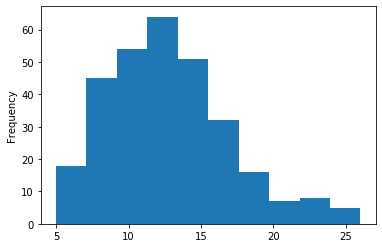

In [41]:
num_obs.iloc[:,1].plot(kind='hist')

In [131]:
# Create the medicine dosage columns
merge6 = pd.merge(merge5[['id', 'time']], df_meds, how = 'left', on =['id'])

In [132]:
## Add empty columns for each medicine with NaN for no dosage as default
merge6 = merge6.join(pd.DataFrame(
   0, 
    index=merge6.index, 
    columns= df_meds.drug.unique() + "_dose"
))

In [133]:
# Iterate through each row and add the corresponding dosage if the time value is in between the start and end date.
for index, row in merge6.iterrows():
    if (row['start_day'] <= row['time']) & ( row['time'] <= row['end_day']):
        #
        col_name = row['drug'] + '_dose'
        merge6[col_name][index] = row['daily_dosage']

C:\Users\sindh\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [134]:
## Keep only the columns created 
## 'labetalol_dose', 'nebivolol_dose' and  columns are removed as it has zero values. 
keep_cols = ['time', 'id', 'atorvastatin_dose', 'losartan_dose', 'metformin_dose',
       'rosuvastatin_dose', 'pravastatin_dose', 'carvedilol_dose',
       'valsartan_dose', 'metoprolol_dose', 'simvastatin_dose',
       'bisoprolol_dose', 'atenolol_dose', 'lovastatin_dose',
       'olmesartan_dose', 'irbesartan_dose', 'canagliflozin_dose',
       'dapagliflozin_dose', 'telmisartan_dose','pitavastatin_dose', 'propranolol_dose']

In [135]:
merge6 = merge6[keep_cols].drop_duplicates()

In [136]:
# aggregate at ID and time level
merge6_cleaned = merge6.groupby(['id','time']).agg(['sum'])

merge6_cleaned.columns = keep_cols[2:]
merge6_cleaned = merge6_cleaned.reset_index()

In [ ]:
merge6_cleaned[]

In [87]:
# # convert categorical variables to numeric 
# from sklearn.preprocessing import LabelEncoder
# from sklearn.preprocessing import OneHotEncoder

# # integer encode
# label_encoder = LabelEncoder()
# integer_encoded = label_encoder.fit_transform(values)
# print(integer_encoded)
# # binary encode
# onehot_encoder = OneHotEncoder(sparse=False)
# integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
# onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
# print(onehot_encoded)

In [137]:

# merge all the data
int_data = pd.merge(merge5, merge6_cleaned, how = "left", on = ['id', 'time'])
final_data = pd.merge(int_data, df_demo, how = "left", on = ['id'])

In [138]:
## As a padding value replace all NaN with a value that is not common to occur in the data. -99 
final_data = final_data.fillna(-99)

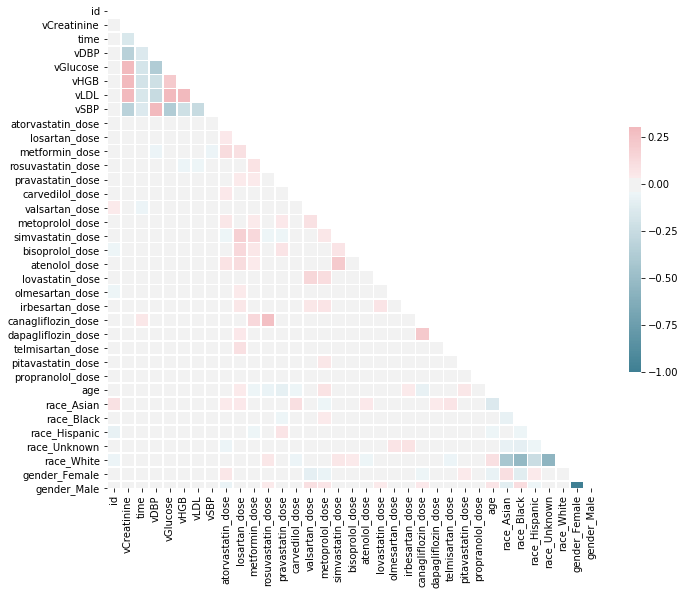

In [139]:
## Plot a correlation plot
# Compute the correlation matrix
corr = final_data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [141]:
## Feature importance

# plt.figure(figsize=(12,3))
# features = final_data.columns.values.tolist()
# importance = clf_best.feature_importances_.tolist()
# feature_series = pd.Series(data=importance,index=features)
# feature_series.plot.bar()
# plt.title('Feature Importance') 

In [142]:
final_data.shape

(3865, 35)

In [194]:
# Shape the Patient data into the desired input format for CNN 

patient = []

for i in range(300):
    sub_data = final_data[final_data.id == i]
    ## Adding dummy rows
    for x in range(26 - sub_data.shape[0]):
        sub_data = sub_data.append(pd.Series([-99, -99, -99, -99, -99, -99, -99,
                                             -99, -99, -99, -99, -99, -99, -99,
                                             -99, -99, -99, -99, -99, -99, -99,
                                             -99, -99, -99, -99, -99, -99, -99,
                                             -99, -99, -99, -99, -99, -99, -99], index=sub_data.columns) , ignore_index=True)
    t1 = np.array(sub_data.values)
    
    t2 = t1.reshape(35, 26, 1)
    patient.append(t2)

patient = np.array(patient)
patient = np.reshape(patient,(patient.shape[0],35,26,1))
print(patient.shape)


(300, 35, 26, 1)


In [197]:
df_stage

,id,Stage_Progress
0,0,True
1,1,False
2,2,True
3,3,False
4,4,True
...,...,...
295,295,True
296,296,False
297,297,True
298,298,False


In [198]:
## Model for predicting the outcome of CKD 
## Prepare the X and Y variables
from keras.utils.np_utils import to_categorical

X = patient
Y = df_stage[['Stage_Progress']].values
Y = to_categorical(Y, 2)

Using TensorFlow backend.


In [199]:
# Split the data into train and test data
from sklearn.model_selection import train_test_split
# 75-25 train test split
(trainX, testX, trainY, testY) = train_test_split(X, Y, test_size=0.25)

In [204]:
print("Training data shape:", trainX.shape, trainY.shape)
print("Test data shape:", testX.shape, testY.shape)

Training data shape: (225, 35, 26, 1) (225, 2)
Test data shape: (75, 35, 26, 1) (75, 2)


## CNN artictecture 

In [205]:
from keras.models import Sequential
from keras.layers import Conv2D, ZeroPadding2D, Activation, Input, concatenate
from keras.models import Model,load_model
from keras.layers.normalization import BatchNormalization
from keras.layers.pooling import MaxPooling2D, AveragePooling2D
from keras.layers.merge import Concatenate
from keras.layers.core import Lambda, Flatten, Dense
from keras.initializers import glorot_uniform
from keras.engine.topology import Layer


from keras import applications,models, losses,optimizers
from keras.models import Model
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.metrics import categorical_accuracy
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping
from keras.utils.np_utils import to_categorical
from keras.callbacks import ModelCheckpoint
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.layers import Input, Dense, Flatten, Dropout, Activation, Lambda, Permute, Reshape
import numpy as np
import keras.backend as K

In [213]:
batch_size = 32
epochs = 100
filepath='keras_model_conv2D'


In [208]:
np.random.seed(109) # for reproducibility
print('Building model...')
model = Sequential()
model = Sequential()

#1st conv layer
model.add(Conv2D(64, (4,10), padding="same",
                 input_shape=(trainX.shape[1],trainX.shape[2],trainX.shape[3])))
model.add(BatchNormalization())
model.add(Activation("relu"))

#2nd conv layer
model.add(Conv2D(32, (4,10), padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))

#3rd conv layer
model.add(Conv2D(32, (4,10), padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))

#4th conv layer
model.add(Conv2D(32, (4,10), padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())

#FC1
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.3))

#FC2
model.add(Dense(100,name ='feature_dense'))
#model.load_weights(by_name=True,filepath = filepath)
model.add(BatchNormalization())
model.add(Activation("relu"))

#output FC
model.add(Dense(2))
model.add(Activation('sigmoid'))
adam = optimizers.Adam(lr=0.01)

model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')
model.summary()

Building model...
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 35, 26, 64)        2624      
_________________________________________________________________
batch_normalization_12 (Batc (None, 35, 26, 64)        256       
_________________________________________________________________
activation_13 (Activation)   (None, 35, 26, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 35, 26, 32)        81952     
_________________________________________________________________
batch_normalization_13 (Batc (None, 35, 26, 32)        128       
_________________________________________________________________
activation_14 (Activation)   (None, 35, 26, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 

In [214]:
early_stops = EarlyStopping(patience=10 , monitor='val_auc')
filepath='ckd_model_conv2D'
ckpt_callback = ModelCheckpoint(filepath,
                                 monitor='val_loss', 
                                 verbose=1, 
                                 save_best_only=True, 
                                 mode='auto')
    
model.fit(X, Y, validation_split=0.05, callbacks=[early_stops,ckpt_callback], 
                        batch_size=batch_size, epochs=epochs)
model.save('ckd_model_conv2D.h5')

Train on 285 samples, validate on 15 samples
Epoch 1/100
285/285 [==============================] - 7s 23ms/step - loss: 0.8409 - accuracy: 0.4930 - val_loss: 27.6656 - val_accuracy: 0.2667

Epoch 00001: val_loss improved from inf to 27.66564, saving model to ckd_model_conv2D
Epoch 2/100


C:\Users\sindh\Anaconda3\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_auc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


285/285 [==============================] - 6s 20ms/step - loss: 0.7403 - accuracy: 0.5596 - val_loss: 9.7942 - val_accuracy: 0.3000

Epoch 00002: val_loss improved from 27.66564 to 9.79425, saving model to ckd_model_conv2D
Epoch 3/100
285/285 [==============================] - 6s 20ms/step - loss: 0.6450 - accuracy: 0.6439 - val_loss: 4.1509 - val_accuracy: 0.5667

Epoch 00003: val_loss improved from 9.79425 to 4.15087, saving model to ckd_model_conv2D
Epoch 4/100
285/285 [==============================] - 6s 22ms/step - loss: 0.6229 - accuracy: 0.6579 - val_loss: 4.7517 - val_accuracy: 0.7333

Epoch 00004: val_loss did not improve from 4.15087
Epoch 5/100
285/285 [==============================] - 6s 22ms/step - loss: 0.5831 - accuracy: 0.7123 - val_loss: 2.8596 - val_accuracy: 0.7333

Epoch 00005: val_loss improved from 4.15087 to 2.85959, saving model to ckd_model_conv2D
Epoch 6/100
285/285 [==============================] - 6s 21ms/step - loss: 0.5548 - accuracy: 0.7123 - val_loss:

285/285 [==============================] - 6s 21ms/step - loss: 0.0700 - accuracy: 0.9719 - val_loss: 1.0816 - val_accuracy: 0.7333

Epoch 00042: val_loss did not improve from 0.53105
Epoch 43/100
285/285 [==============================] - 6s 21ms/step - loss: 0.0492 - accuracy: 0.9860 - val_loss: 1.0284 - val_accuracy: 0.6667

Epoch 00043: val_loss did not improve from 0.53105
Epoch 44/100
285/285 [==============================] - 6s 22ms/step - loss: 0.0616 - accuracy: 0.9789 - val_loss: 1.1835 - val_accuracy: 0.6000

Epoch 00044: val_loss did not improve from 0.53105
Epoch 45/100
285/285 [==============================] - 6s 22ms/step - loss: 0.0456 - accuracy: 0.9895 - val_loss: 1.0575 - val_accuracy: 0.7000

Epoch 00045: val_loss did not improve from 0.53105
Epoch 46/100
285/285 [==============================] - 6s 22ms/step - loss: 0.0262 - accuracy: 0.9930 - val_loss: 0.8963 - val_accuracy: 0.7000

Epoch 00046: val_loss did not improve from 0.53105
Epoch 47/100
285/285 [======


Epoch 00083: val_loss did not improve from 0.53105
Epoch 84/100
285/285 [==============================] - 8s 29ms/step - loss: 0.0369 - accuracy: 0.9895 - val_loss: 1.6260 - val_accuracy: 0.5333

Epoch 00084: val_loss did not improve from 0.53105
Epoch 85/100
285/285 [==============================] - 7s 26ms/step - loss: 0.0214 - accuracy: 0.9912 - val_loss: 1.7989 - val_accuracy: 0.5333

Epoch 00085: val_loss did not improve from 0.53105
Epoch 86/100
285/285 [==============================] - 7s 23ms/step - loss: 0.0130 - accuracy: 0.9982 - val_loss: 1.6080 - val_accuracy: 0.6000

Epoch 00086: val_loss did not improve from 0.53105
Epoch 87/100
285/285 [==============================] - 8s 27ms/step - loss: 0.0168 - accuracy: 0.9965 - val_loss: 1.5797 - val_accuracy: 0.6000

Epoch 00087: val_loss did not improve from 0.53105
Epoch 88/100
285/285 [==============================] - 8s 28ms/step - loss: 0.0209 - accuracy: 0.9965 - val_loss: 1.5666 - val_accuracy: 0.5333

Epoch 00088: v

In [215]:
## Load the model and perform prediction on test data

pred_Y = model.predict(testX, batch_size = 32, verbose = True)

75/75 [==============================] - 0s 5ms/step


In [220]:
pred_Y[[0]]

array([[0.9966455 , 0.00334346]], dtype=float32)

In [222]:
testY[[0]]

array([[1., 0.]], dtype=float32)